In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## Erdos-Renyi Random Graph
Given two paramters, `n` the number of nodes, and `p`, the probability of edge creation, networkx will create a random graph $G_{n,p}$

In [24]:
G = nx.fast_gnp_random_graph(10, 0.5, directed=True)

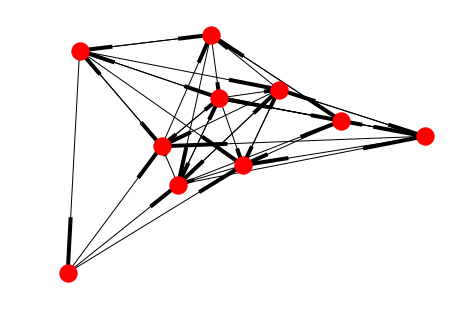

In [25]:
nx.draw(G)

## Newman-Watts-Strogatz Random Graph
### Small world graphs
Parameters  

`n` = number of nodes  
`k` = each node is connected to $k$ nearest neighbours in ring topology  
`p` = probability of rewiring each edge  
`tries` = number of attempts to create a connected graph

In [26]:
n = 10
k = 3
p = 0.8

# build random graph
G = nx.connected_watts_strogatz_graph(n, k, p)

# make G directed
edges = G.edges()
G = nx.DiGraph(edges)

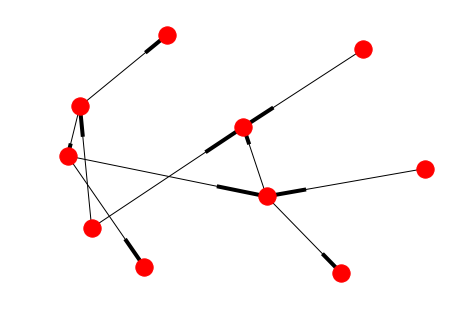

In [27]:
nx.draw(G)

# The MSE method
We will compare two rankings by computing the mean square error of the change in rank.

In [31]:
def MSE(pr1, pr2):
    nodes = pr1.keys()
    rank1 = sorted(pr1, key=pr1.get, reverse=True)
    rank2 = sorted(pr2, key=pr2.get, reverse=True)
    
    error = 0
    for node in nodes:
        x = rank1.index(node)
        y = rank2.index(node)
        error += (x-y)**2
    
    return np.sqrt(error)

In [32]:
pr1 = nx.pagerank(G, alpha = 0.1)
pr2 = nx.pagerank(G, alpha = 0.9)

In [33]:
MSE(pr1,pr2)

0.0

# Experiment 1
Here we will generate random graphs using the ER method and compute their pagerank while varying the probability parameter. We will use MSE to estimate the amount of varyation in page rankings at different values of the parameter.

In [34]:
# construct a dataframe to store our data
res = 20 # the resolution
df_ER = pd.DataFrame(columns=range(res-1))
df_ER

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18


In [52]:
n_iterations = 100
n_nodes = 50
p_create_edge = 0.5
for __ in xrange(n_iterations):
    G = nx.fast_gnp_random_graph(n=n_nodes, p=p_create_edge, directed=True)
    pr_prev = nx.pagerank(G, alpha=0)
    errors = []
    for alpha in [(1.0/res)*(x+1) for x in range(res-1)]:
        pr_next = nx.pagerank(G, alpha=alpha) # compute new page rank
        
        # compute MSE
        error = MSE(pr_prev, pr_next)
        errors.append(error)
        
        pr_prev = pr_next # prepare for next iteration
    new_row = pd.Series(errors)
    df_ER = df_ER.append(new_row, ignore_index=True)

In [49]:
df_ER

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,148.371156,4.000000,2.000000,2.449490,2.000000,2.000000,2.449490,1.414214,2.000000,2.449490,2.828427,2.000000,2.449490,2.000000,2.000000,2.449490,2.000000,0.000000,2.449490
1,136.667480,2.000000,2.000000,2.449490,2.000000,2.000000,3.162278,2.449490,2.449490,1.414214,2.000000,2.000000,2.000000,2.000000,3.741657,2.449490,1.414214,2.000000,2.828427
2,145.223965,2.449490,2.828427,1.414214,2.449490,3.162278,1.414214,1.414214,2.000000,2.828427,2.828427,2.828427,2.449490,2.000000,2.000000,2.000000,1.414214,1.414214,2.449490
3,145.106857,1.414214,2.449490,2.000000,3.162278,4.000000,2.828427,3.162278,3.741657,3.464102,2.828427,2.000000,2.828427,1.414214,2.828427,2.000000,3.464102,3.162278,2.449490
4,169.652586,3.162278,2.449490,2.449490,2.000000,2.000000,1.414214,3.741657,3.741657,4.000000,2.449490,2.449490,2.449490,2.828427,4.000000,2.000000,2.000000,3.162278,1.414214
5,137.913016,2.000000,2.449490,2.000000,0.000000,2.449490,2.449490,3.162278,3.741657,2.449490,2.828427,2.000000,2.449490,2.000000,2.828427,3.162278,3.464102,2.449490,2.828427
6,145.203306,4.242641,3.464102,1.414214,2.828427,3.162278,2.828427,2.000000,2.449490,2.828427,2.828427,2.828427,2.449490,2.449490,1.414214,2.449490,2.000000,2.000000,2.449490
7,145.691455,1.414214,2.000000,1.414214,1.414214,4.000000,2.449490,2.000000,1.414214,4.000000,2.449490,1.414214,1.414214,1.414214,2.449490,1.414214,2.000000,2.449490,2.000000
8,151.148933,3.162278,2.000000,2.000000,2.449490,2.000000,0.000000,2.000000,1.414214,0.000000,1.414214,1.414214,2.000000,1.414214,3.741657,2.449490,2.000000,2.449490,3.464102
9,152.400787,2.000000,2.449490,3.162278,3.741657,1.414214,1.414214,1.414214,1.414214,2.000000,1.414214,2.000000,0.000000,2.000000,1.414214,2.449490,2.449490,2.000000,1.414214


In [53]:
means = []
for col in df_ER.columns:
    data = df_ER[col]
    mean = np.mean(data)
    means.append(mean)

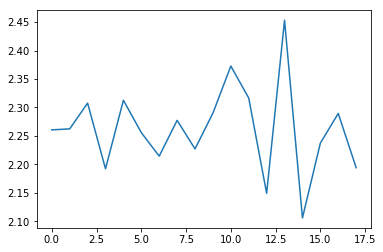

In [54]:
plt.plot(means[1:])

In [94]:
for col in df_ER.columns:
    data = df_ER[col]
    mean = np.mean(data)
    var = np.var(data)
    print col, mean, var

0 398.826290453 521.790043781
1 4.41139125043 0.939627235661
2 4.29766106657 0.730109356863
3 4.65222313044 0.956819944575
4 4.63770754432 0.491668733365
5 4.1026789957 0.768025058246
6 3.86018486526 0.898972806006
7 4.16628602824 1.24206073088
8 4.27274194784 0.543676247168
9 3.99108449329 0.871244567419
10 4.14582414083 0.412142193293
11 4.11654847578 0.854028646526
12 4.15417373241 0.542840600924
13 4.55488493928 1.25302318991
14 3.83550028521 0.488937562131
15 4.00074620393 0.594029811756
16 4.08875654686 0.482069900499
17 4.01135721738 0.709013274601
18 3.88445313912 0.511023809992


In [89]:
df_ER[0].tolist()

[392.6143145632874,
 390.57393666244553,
 424.83173139491356,
 367.5214279467253,
 429.53463189829057,
 416.746925603537,
 390.08204265256813,
 372.8028969844521,
 375.13464249519797,
 428.4203543250484]